<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

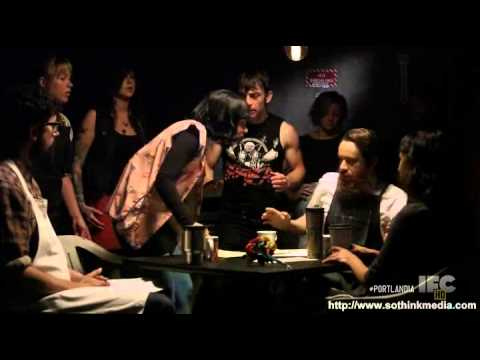

In [129]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [130]:
%pwd

'/home/iesouskurios/lambda/unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [131]:
import seaborn as sns
import re

In [132]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [133]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [134]:
X = shops.copy()

In [135]:
X['star_rating'] = X['star_rating'].map(lambda x: x.rstrip('star rating'))

In [136]:
X.star_rating.value_counts()

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

In [137]:
X['full_review_text'] = X['full_review_text'].apply(lambda x: x.lower())

In [138]:
X.full_review_text.head()

0     11/25/2016 1 check-in love love loved the atm...
1     12/2/2016 listed in date night: austin, ambia...
2     11/30/2016 1 check-in listed in brunch spots ...
3     11/25/2016 very cool decor! good drinks nice ...
4     12/3/2016 1 check-in they are located within ...
Name: full_review_text, dtype: object

In [139]:
X['date'] = X['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")

In [140]:
X.date

0       11/25/2016
1        12/2/2016
2       11/30/2016
3       11/25/2016
4        12/3/2016
           ...    
7611     2/19/2015
7612     1/21/2016
7613     4/30/2015
7614      8/2/2015
7615     5/23/2015
Name: date, Length: 7616, dtype: object

In [141]:
def remove_dates(sentence):
    """remove the dates like Mar 30  2013"""
    sentence = re.sub('(0|1|2|3|4|5|6|7|8|9|10|11|12|/|check-in)', '', sentence)
    return sentence

In [142]:
X['full_review_text'].apply(remove_dates)

0           love love loved the atmosphere! every corn...
1         listed in date night: austin, ambiance in au...
2           listed in brunch spots i loved the eclecti...
3         very cool decor! good drinks nice seating  h...
4           they are located within the northcross mal...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok, the steeping room is awesome. how do the...
7613      loved coming here for tea, and the atmospher...
7614      the food is just average. the booths didn't ...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text, Length: 7616, dtype: object

In [143]:
X['full_review_text'] = X['full_review_text'].apply(remove_dates)

In [144]:
X['full_review_text'].head()

0        love love loved the atmosphere! every corn...
1      listed in date night: austin, ambiance in au...
2        listed in brunch spots i loved the eclecti...
3      very cool decor! good drinks nice seating  h...
4        they are located within the northcross mal...
Name: full_review_text, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [157]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    tokens = text.replace('and', '')
   
    
    return tokens

In [158]:
X['full_review_text'].apply(tokenize)

0           love love loved the atmosphere! every corn...
1         listed in date night: austin, ambiance in au...
2           listed in brunch spots i loved the eclecti...
3         very cool decor! good drinks nice seating  h...
4           they are located within the northcross mal...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok, the steeping room is awesome. how do the...
7613      loved coming here for tea,  the atmosphere w...
7614      the food is just average. the booths didn't ...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text, Length: 7616, dtype: object

In [147]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [148]:
X['tokens'] = X['full_review_text'].apply(tokenize)

In [149]:
X['tokens'].head()

0        love love loved the atmosphere! every corn...
1      listed in date night: austin, ambiance in au...
2        listed in brunch spots i loved the eclecti...
3      very cool decor! good drinks nice seating  h...
4        they are located within the northcross mal...
Name: tokens, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [150]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
X['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 811098),
 ('e', 412665),
 ('t', 305567),
 ('o', 262145),
 ('a', 246060),
 ('i', 235318),
 ('s', 205429),
 ('r', 179580),
 ('n', 168321),
 ('h', 155694)]

In [151]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [152]:
# Use the Function
wc = count(X['tokens'])

In [153]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15,,7616,811098,1.0,0.195609,0.195609,1.000000
5,e,7616,412665,2.0,0.099520,0.295129,1.000000
9,t,7613,305567,3.0,0.073692,0.368821,0.999606
4,o,7615,262145,4.0,0.063220,0.432041,0.999869
21,a,7614,246060,5.0,0.059341,0.491382,0.999737


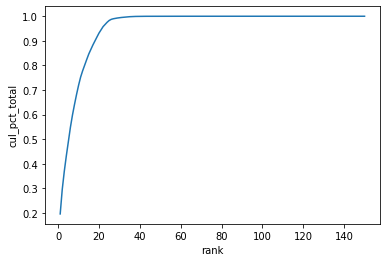

In [154]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [155]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.9315954329107478

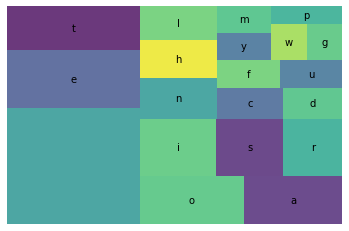

In [156]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

